# Harjeet Singh Yadav
## CSAI - 2020561

# Importing important  libraries

In [1]:
import tensorflow as tf  
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading MNIST dataset

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()  # loads the popular "mnist" training dataset

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

# Data Scaling

In [7]:
x_train = x_train/255.0
x_test = x_test/255.0

# Data Visualisation

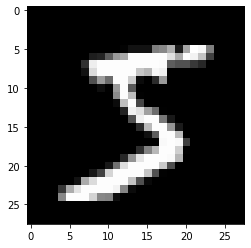

In [8]:
plt.imshow(x_train[0], cmap="gray")         # Sample no 1 of test case

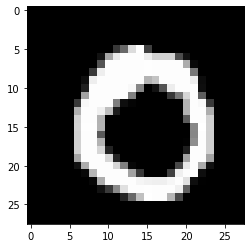

In [9]:
plt.imshow(x_train[56], cmap="gray")    # Sample no 56 of the testcase

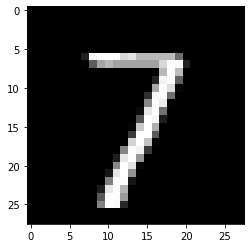

In [10]:
plt.imshow(x_train[560], cmap="gray")    # Sample no 56 of the testcase

# Building AUTO-ENCODERS

### ENCODERS

In [11]:
encoder_input = keras.Input(shape=(28, 28, 1), name='img')          # setting enoder input size layer of encoder
x = keras.layers.Flatten()(encoder_input)


Input_layer = keras.layers.Dense(512, activation="relu")(x)
Hidden_layer = keras.layers.Dense(128, activation="relu")(Input_layer)
Latent_space = keras.layers.Dense(64, activation="relu")(Hidden_layer)

encoder = keras.Model(encoder_input, Latent_space, name='encoder')



### DECODER PART

In [12]:
decoder_input = keras.layers.Dense(128, activation="relu")(Latent_space)
d_Hidden_layer = keras.layers.Dense(512, activation="relu")(decoder_input)
d_output = keras.layers.Dense(784, activation="relu")(d_Hidden_layer)

decoder_output = keras.layers.Reshape((28, 28, 1))(d_output)

# Model summary

In [13]:
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()            # summary of all the layers 

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 512)               

# Training the Model

In [14]:
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)        # Adam optimizer
autoencoder.compile(opt, loss='mse')                        # Mean Squared error loss

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
history = autoencoder.fit( x_train, x_train, validation_data=(x_test, x_test), epochs=5,  batch_size=40, validation_split=0.10 )

Epoch 1/5
1350/1350 [==============================] - 23s 17ms/step - loss: 0.0194 - val_loss: 0.0124
Epoch 2/5
1350/1350 [==============================] - 15s 11ms/step - loss: 0.0115 - val_loss: 0.0107
Epoch 3/5
1350/1350 [==============================] - 15s 11ms/step - loss: 0.0102 - val_loss: 0.0101
Epoch 4/5
1350/1350 [==============================] - 15s 11ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 5/5
1350/1350 [==============================] - 15s 11ms/step - loss: 0.0091 - val_loss: 0.0091


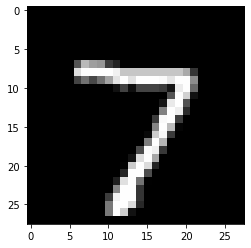

In [16]:
plt.imshow(x_test[0], cmap="gray")             # original data 

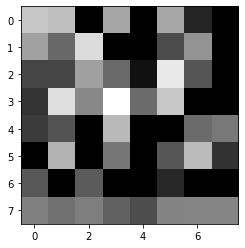

In [17]:
example = encoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])
class_wise = [ 0.87 , 0.95 , 0.97 , 0.96 , 0.90 , 0.98 , 0.96 , 0.97 , 0.89, 0.94]
plt.imshow(example[0].reshape((8,8)), cmap="gray")               # ecoded data

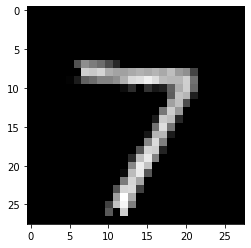

In [18]:
ae_out = autoencoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])      # decoder data / output
plt.imshow(ae_out[0].reshape((28,28)), cmap="gray")

In [19]:
# evaluate the model
train_acc = autoencoder.evaluate(x_train, x_train, verbose=0)
test_acc = autoencoder.evaluate(x_test, x_test, verbose=0)

In [20]:
print("Loss during training : ", train_acc )
print("Loss during testing : ", test_acc )

Loss during training :  0.008890422992408276
Loss during testing :  0.00897013396024704


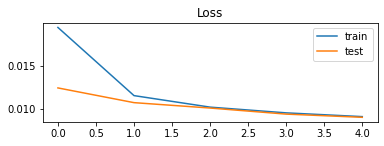

In [21]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# MNIST classification modeL

### using the encoder part again

In [25]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()  # loads the popular "mnist" training dataset

In [26]:
feed_forward = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(512, activation = "relu"),
                             tf.keras.layers.Dense(128, activation = "relu"),
                             tf.keras.layers.Dense(64, activation = "relu"),
                             tf.keras.layers.Dense(32, activation = "relu"),
                             tf.keras.layers.Dense(10, activation = "softmax")
])

# Model Summary 

In [27]:
feed_forward.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               401920    
                                                                 
 dense_14 (Dense)            (None, 128)               65664     
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 10)                330       
                                                                 
Total params: 478,250
Trainable params: 478,250
Non-trai

In [28]:
feed_forward.compile( optimizer= tf.keras.optimizers.SGD(learning_rate=0.1),
                      loss = "categorical_crossentropy",
                      metrics = ["accuracy"]
                     )


In [29]:
from tensorflow.keras.utils import to_categorical                # for one hot encoding of output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [30]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# Training the model

In [31]:
history = feed_forward.fit(x_train, y_train,validation_data=(x_test, y_test), epochs = 15, batch_size = 40, verbose = 0)

In [32]:
# evaluate the model
train_acc = feed_forward.evaluate(x_train, y_train, verbose=0)
test_acc = feed_forward.evaluate(x_test, y_test, verbose=0)

In [35]:
print("Loss during training : ", train_acc[0])
print("Accuray of training : ", train_acc[1])

Loss during training :  nan
Accuray of training :  0.9871666878461838


In [36]:
print("Loss during testing : ", test_acc[0])
print("Accuray of testing : ", test_acc[1])

Loss during testing :  nan
Accuray of testing :  0.9799999743700027
